In [81]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
print(train_images.shape)

In [ ]:
to_binary_train_label = to_categorical(train_labels)

In [79]:

model = Sequential(name="mnist")
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu", name="Hidden-2"))
model.add(Dense(32, activation="relu", name="Hidden-3"))
model.add(Dense(10, activation="softmax", name="Output"))
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])


In [80]:
history = model.fit(train_images, to_binary_train_label, epochs=5,validation_split=0.2,batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3617 - accuracy: 0.8325 - val_loss: 0.0767 - val_accuracy: 0.9131
Epoch 2/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0567 - accuracy: 0.9300 - val_loss: 0.0433 - val_accuracy: 0.9422
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0366 - accuracy: 0.9501 - val_loss: 0.0424 - val_accuracy: 0.9439
Epoch 4/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0296 - accuracy: 0.9584 - val_loss: 0.0341 - val_accuracy: 0.9503
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0246 - accuracy: 0.9639 - val_loss: 0.0305 - val_accuracy: 0.9579


In [89]:
model.evaluate(test_images, to_categorical(test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.0270 - accuracy: 0.9617


[0.027046840637922287, 0.9617000222206116]

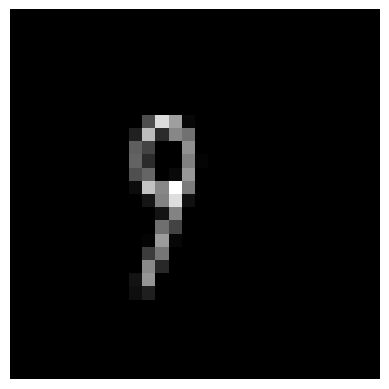

1/1 [==============================] - 0s 30ms/step
Predicted Label: 5


In [112]:


# Load the image from your local machine
image_path = '/Users/rusab1/Downloads/nine.png'  # Replace with the path to your image
image = Image.open(image_path)

# Convert the image to grayscale (if needed) and resize it to 28x28 pixels
image = image.convert('L')  # Convert to grayscale
image = image.resize((28, 28))

# Convert the image to a NumPy array
image_array = np.array(image)

# Normalize pixel values to be between 0 and 1
#image_array = image_array / 255.0

# Reshape the image to match the input shape expected by the model
image_array = image_array.reshape((1,28, 28))

# Display the image
plt.imshow(image_array.reshape(28, 28), cmap='gray')  # Show the image in grayscale
plt.axis('off')
plt.show()

# Use the trained model to predict on the loaded image
predictions = model.predict(image_array)

# Get the predicted label (digit with highest probability)
predicted_label = predictions.argmax()

print(f"Predicted Label: {predicted_label}")


In [110]:
model.save("numerical_model.h5")

/Users/rusab1/Work/learntorch/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [111]:
model.summary()

Model: "mnist"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 Hidden-2 (Dense)            (None, 128)               100480    
                                                                 
 Hidden-3 (Dense)            (None, 32)                4128      
                                                                 
 Output (Dense)              (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


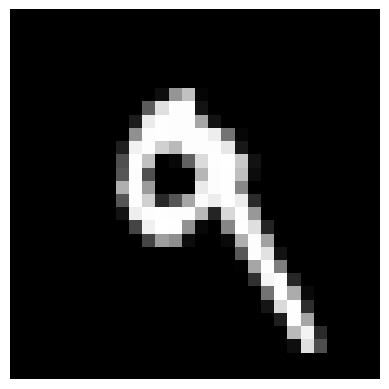

1/1 [==============================] - 0s 24ms/step
[[1.6872086e-07 8.8055431e-06 2.2706623e-05 3.6550578e-04 8.8624109e-04
  9.8726625e-05 8.1623517e-09 3.8847898e-04 4.9225640e-05 9.9818015e-01]]
Predicted Label: 9


In [104]:
image_array = test_images[7]



#image_array = image_array / 255.0

# Reshape the image to match the input shape expected by the model
image_array = image_array.reshape((1,28, 28))

# Display the image
plt.imshow(image_array.reshape(28, 28), cmap='gray')  # Show the image in grayscale
plt.axis('off')
plt.show()

# Use the trained model to predict on the loaded image
predictions = model.predict(image_array)

# Get the predicted label (digit with highest probability)
predicted_label = predictions.argmax()

print(predictions)

print(f"Predicted Label: {predicted_label}")